Goal of script is to pull in .wav file, split into 100 ms windows, apply sfft to each window

Import modules

In [35]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
from skimage import util
from scipy import signal

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/USVs/CPA_pair_exp/18.12.07_CPA_pair_3x/535.wav'

In [14]:
def create_slice_from_wav(file_path, slice_len, step_size):
    #read in wav file
    samp_freq, sig_data = wavfile.read(file_path)
    print('Sampling frequency: ' + str(samp_freq))
    
    #determine number of samples and length
    n_samples = sig_data.shape[0]
    print('Number of samples: ' + str(n_samples))
    sig_len = n_samples/samp_freq
    print('Length: ' + str(sig_len) + ' sec')
    
    #create slices 
    M = slice_len
    steps = int(M*step_size)
    slices = util.view_as_windows(sig_data, window_shape=(M,), step=steps)
    print(f'Audio shape: {sig_data.shape}, Sliced audio shape: {slices.shape}')
    
    return samp_freq, sig_data, slices, steps

In [15]:
samp_freq, sig_data, slices, steps = create_slice_from_wav(file_path, 25000, 0.5)

Sampling frequency: 250000
Number of samples: 180748288
Length: 722.993152 sec
Audio shape: (180748288,), Sliced audio shape: (14458, 25000)


In [16]:
def create_spec_from_slice(sli, nperseg, nfft, i):
    freqs, times, Sx = signal.spectrogram(sli, fs=samp_freq, nperseg = nperseg, nfft = nfft)
    f, ax = plt.subplots()
    plt.pcolormesh((times*1000) + (i*steps/250), freqs / 1000, 10 * np.log10(Sx))
    ax.ticklabel_format(useOffset=False)
    plt.ylabel('Frequency [kHz]')
    plt.xlabel('Time [msec]')
    plt.show()
    return freqs, times, Sx

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


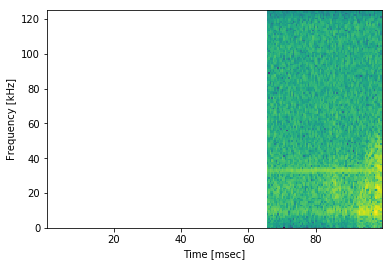

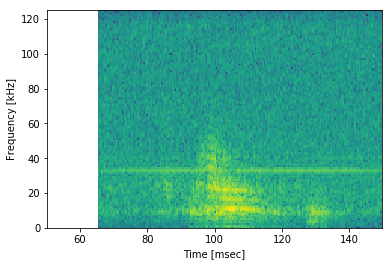

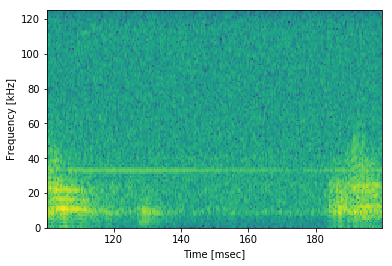

In [64]:
i = 0
spec_slices = {}
spec_slices_ravel = {}
for sli in slices[0:3]:
    freqs, times, Sx = create_spec_from_slice(sli, 128, 256, i)
    spec_slices[i] = np.log10(Sx)
    spec_slices_ravel[i] = spec_slices[i].ravel().T
    i = i + 1

In [66]:
spec_slices_ravel
pd.DataFrame(spec_slices_ravel).T

,0,1,2,3,4,5,6,7,8,9,...,28757,28758,28759,28760,28761,28762,28763,28764,28765,28766
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034791,0.157594,0.029311,0.154757,0.025271,0.277930,0.088891,0.031531,0.048322,0.043249
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.082405,0.036593,0.106401,0.242589,0.012758,0.078751,0.040824,0.016307,0.014834,0.000645
2,1.385256,2.980197,36.400345,14.312963,23.864168,1.566864,12.290141,1.026281,32.817505,48.472214,...,0.008817,0.037948,0.169130,0.091708,0.099464,0.039362,0.032758,0.117893,0.003960,0.020596


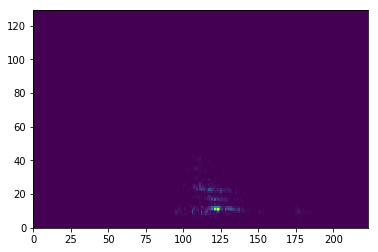

In [23]:
plt.pcolormesh(Sx)

In [ ]:
i = 1
nperseg = 128
nfft = 256
freqs, times, Sx = signal.spectrogram(slices[i], fs=samplingFrequency, nperseg = nperseg, nfft = nfft)
f, ax = plt.subplots()
plt.pcolormesh((times*1000) + (i*step/250), freqs / 1000, 10 * np.log10(Sx))
ax.ticklabel_format(useOffset=False)

plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [msec]')
plt.show()

In [ ]:
M = 25000
step = int(M/2)
slices = util.view_as_windows(signalData, window_shape=(M,), step=step)
print(f'Audio shape: {signalData.shape}, Sliced audio shape: {slices.shape}')

In [ ]:
times 

In [ ]:
freqs

In [ ]:
times

In [ ]:
slices

In [ ]:
plt.specgram(slices[2],Fs=samplingFrequency)

In [ ]:
n = signalData.shape[0]
print('Number of samples: ' + str(n))
l = n/samplingFrequency
print('Length: ' + str(l) + ' sec')

Open dialog box and prompt user to select directory containing the data files 

Loop through path names to create pandas data table from excel file. Get animal number and session type from path name (animal number is part of file name)

In [ ]:
writer = pd.ExcelWriter('USV_counts.xlsx', engine='xlsxwriter')
counts.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [ ]:
counts = USV_groups.groupby(['Session'])['Annotation'].count()
counts

In [ ]:
USV_groups = data_table.replace('mid slug', 'low slug', inplace = True)
USV_groups = data_table.replace(['bbc wide', 'bbc long', 'bbc high', 'bbc low'], 'bbc')
USV_groups['Annotation'].unique()

Organize call types into 

In [ ]:
data_table.head()

In [ ]:
data_table.drop(['Selection', 'View', 'Channel'], axis=1, inplace = True)

In [ ]:
data_table = pd.DataFrame()

i = 0

for path in path_names:
    data = pd.read_table(path)
    data_table_int = pd.DataFrame(data = data)
    
    name = re.search("\d\d\d", path).group(0)
    name_mult = [name] * len(data_table_int)
    session = re.search("base|cagepair|CPApair", path).group(0)
    session = [session] * len(data_table_int)
    i = i + 1
    
    data_table_int = data_table_int.assign(Animal = name_mult)
    data_table_int = data_table_int.assign(Session = session)
    
    data_table = data_table.append(data_table_int, ignore_index=True)

data_table.head()